In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# -----------------------------------------
# 2. Exclude ID column
# -----------------------------------------
id_column = "ID#"   # change if your dataset uses a different name
df_id = df[[id_column]]
df_numeric = df.drop(columns=[id_column])

# -----------------------------------------
# 3. Handle Missing Values (numeric only)
# -----------------------------------------
print("Missing Values:\n", df_numeric.isnull().sum())

numeric_cols = df_numeric.select_dtypes(include=[np.number]).columns
df_numeric[numeric_cols] = df_numeric[numeric_cols].fillna(df_numeric[numeric_cols].median())

# -----------------------------------------
# 4. Remove Outliers using IQR (except ID)
# -----------------------------------------
def remove_outliers_iqr(dataframe, columns):
    df_clean = dataframe.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_numeric = remove_outliers_iqr(df_numeric, numeric_cols)

print("Shape after outlier removal:", df_numeric.shape)

# -----------------------------------------
# 5. Scaling Numeric Features (excluding ID)
# -----------------------------------------
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric[numeric_cols]),
    columns=numeric_cols
)

print("\nScaled Data (first 5 rows):")
print(df_scaled.head())

# -----------------------------------------
# 6. Reattach ID column
# -----------------------------------------
df_final = pd.concat([df_id.reset_index(drop=True), df_scaled], axis=1)

print("\nFinal Preprocessed Dataset:")
print(df_final.head())


Missing Values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
Shape after outlier removal: (945, 11)

Scaled Data (first 5 rows):
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.597126         0.0        0.0        0.0        0.0    -0.562489   
1  0.001308         0.0        0.0        0.0        0.0    -0.521833   
2  1.481647         0.0        0.0        0.0        0.0     3.353346   
3 -0.297839         0.0        0.0        0.0        0.0    -0.239227   
4 -0.187768         0.0        0.0        0.0        0.0    -0.735028   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0    -0.503199                0.0              0.0           1.659229     0.0  
1    -0.218965                0.0              0.0


--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                1077 non-null   int64
 1   Balance            1077 non-null   int64
 2   Qual_miles         1077 non-null   int64
 3   cc1_miles          1077 non-null   int64
 4   cc2_miles          1077 non-null   int64
 5   cc3_miles          1077 non-null   int64
 6   Bonus_miles        1077 non-null   int64
 7   Bonus_trans        1077 non-null   int64
 8   Flight_miles_12mo  1077 non-null   int64
 9   Flight_trans_12    1077 non-null   int64
 10  Days_since_enroll  1077 non-null   int64
 11  Award?             1077 non-null   int64
dtypes: int64(12)
memory usage: 109.4 KB
None

--- DESCRIPTIVE STATISTICS ---
               ID#       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  1077.000000   1077.000000      1077.0     1077.0     1077.0     1077.

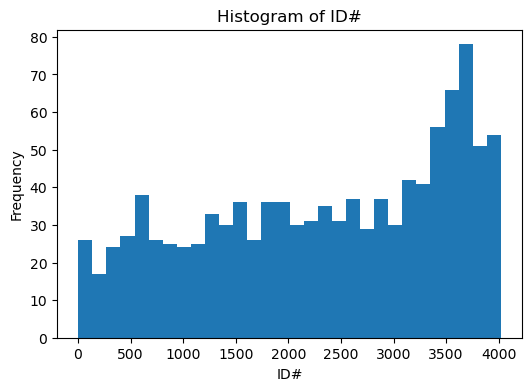

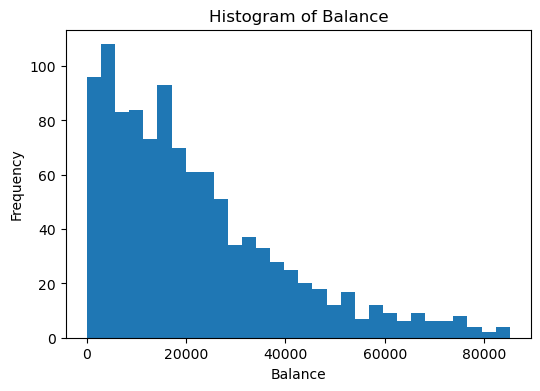

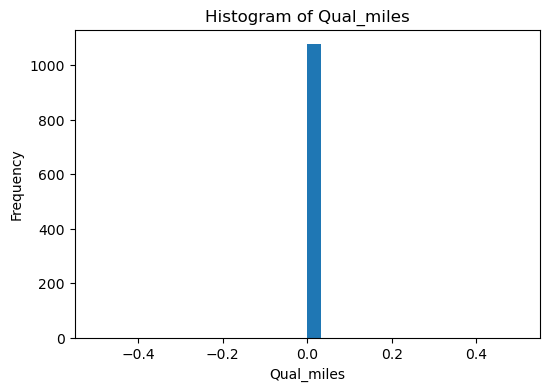

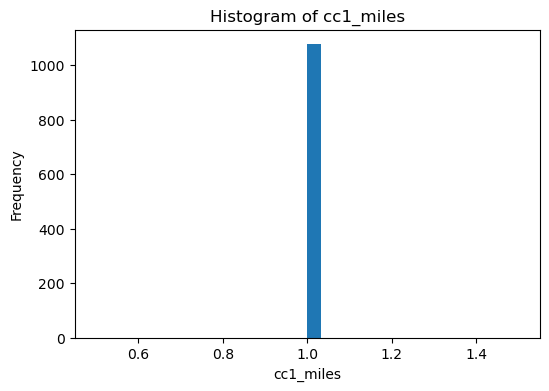

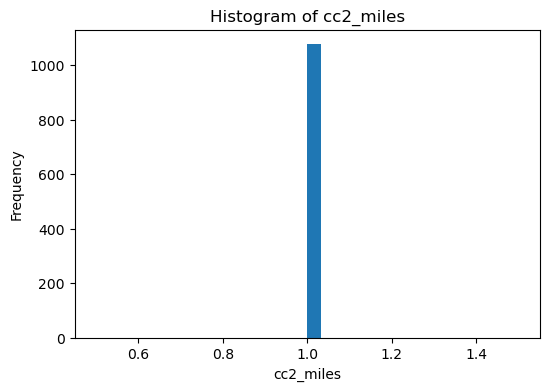

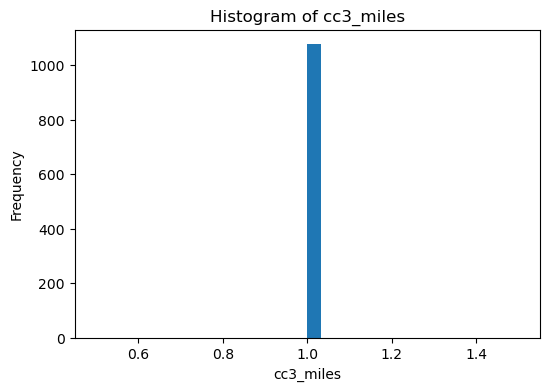

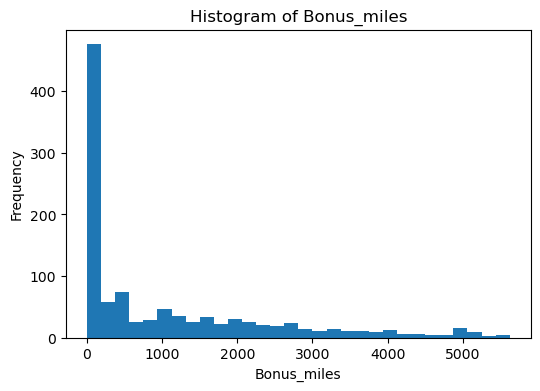

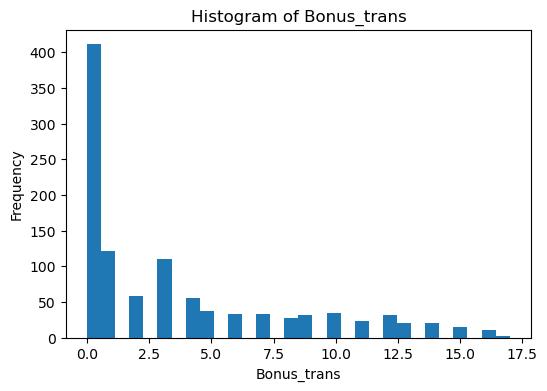

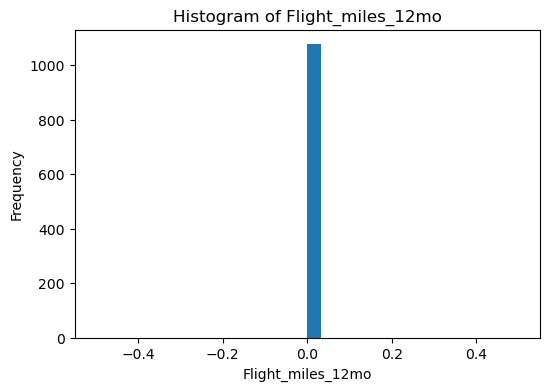

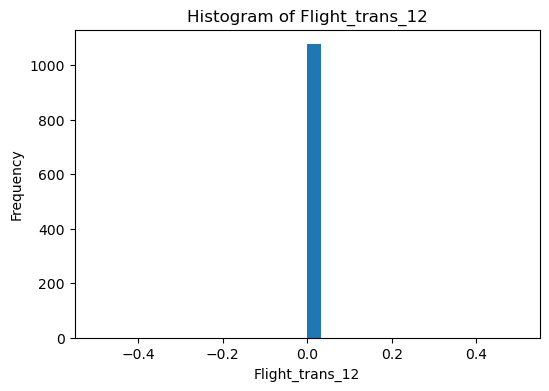

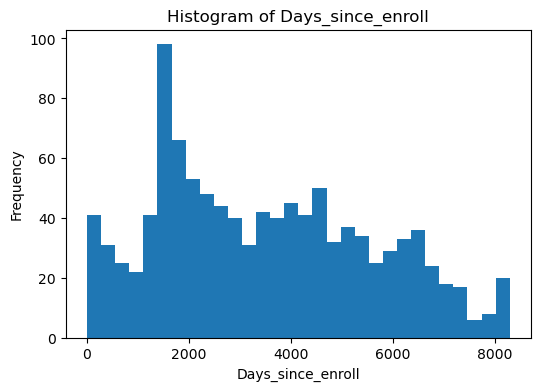

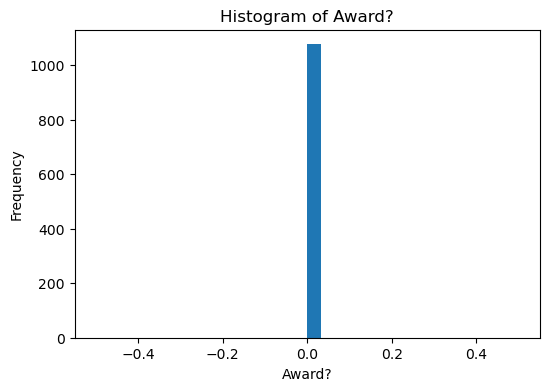

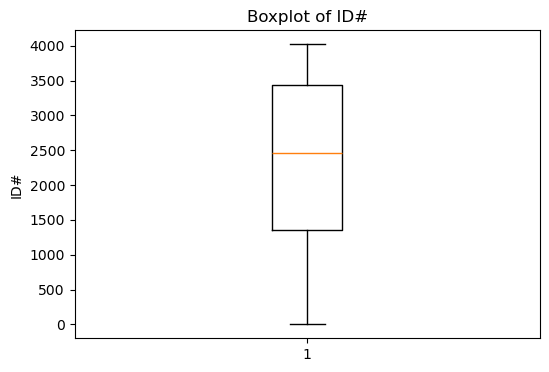

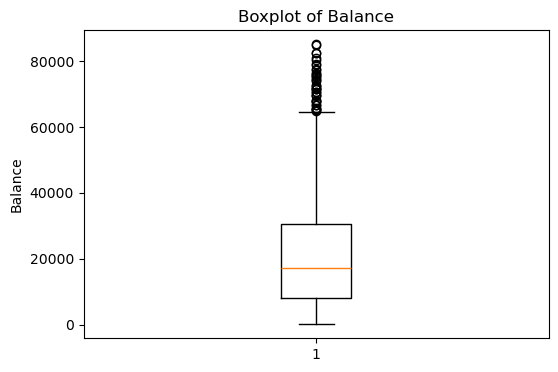

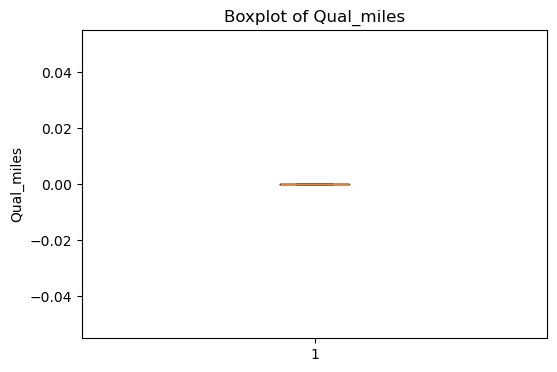

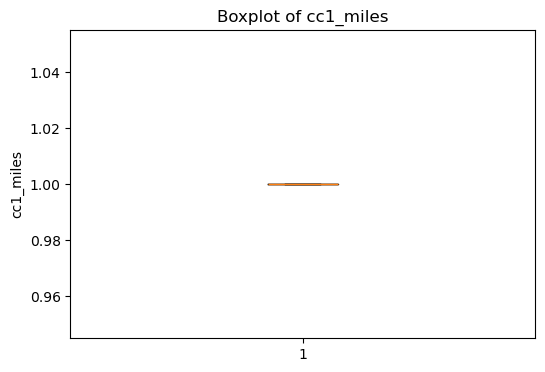

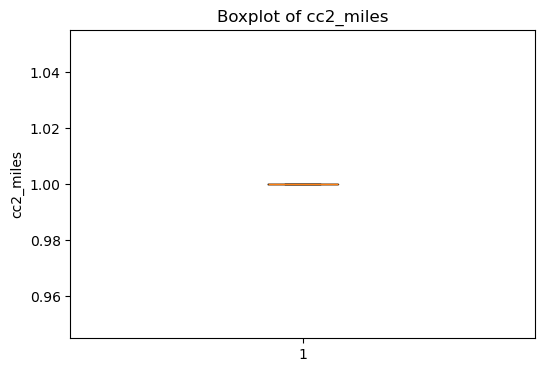

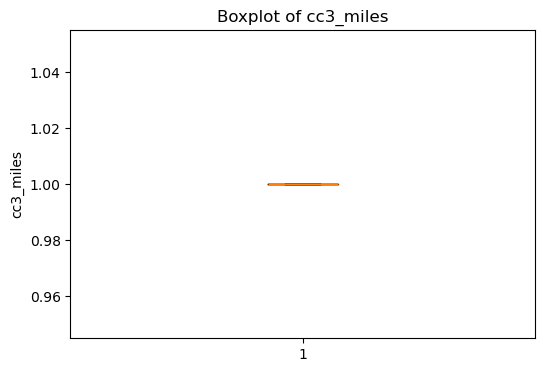

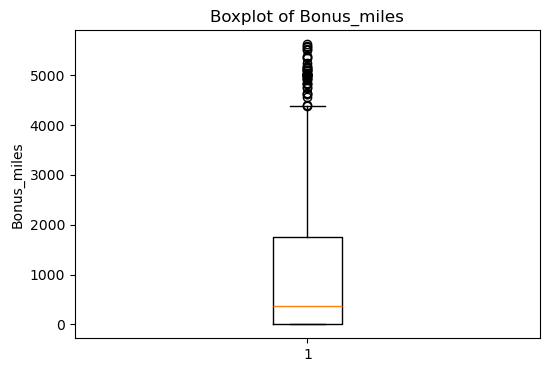

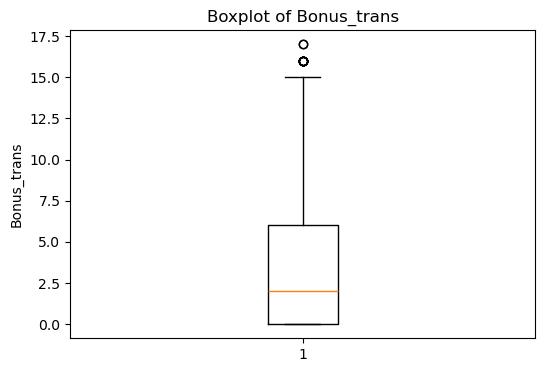

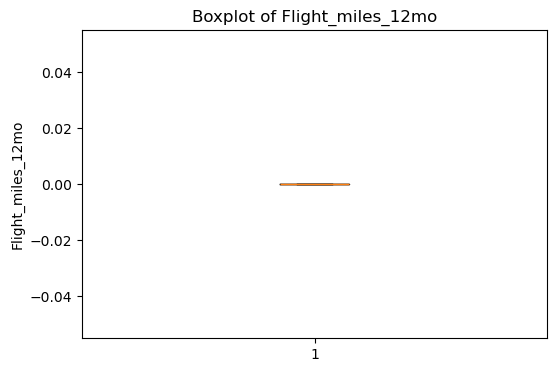

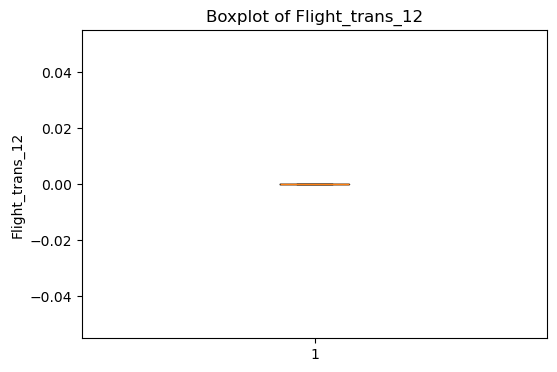

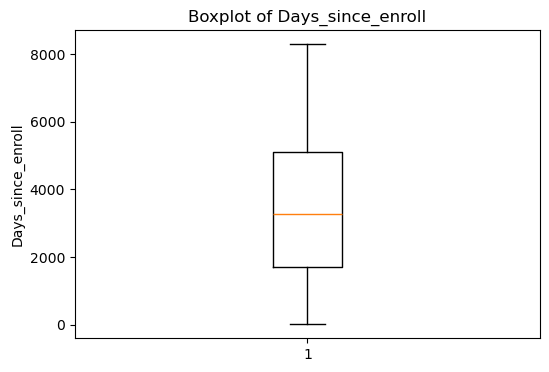

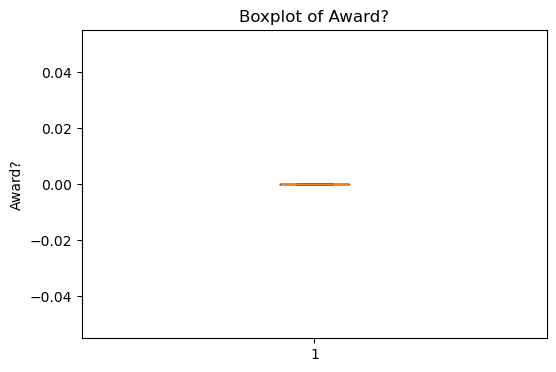

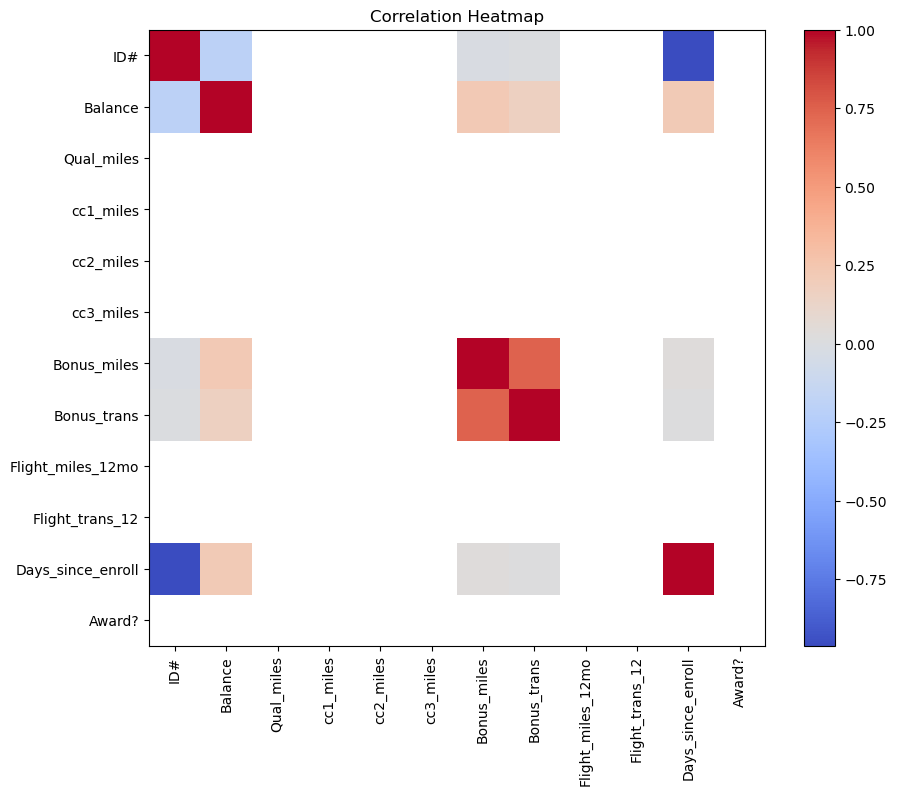


Columns used for scatter plots (highest variance): ['Balance', 'Days_since_enroll', 'Bonus_miles', 'ID#']


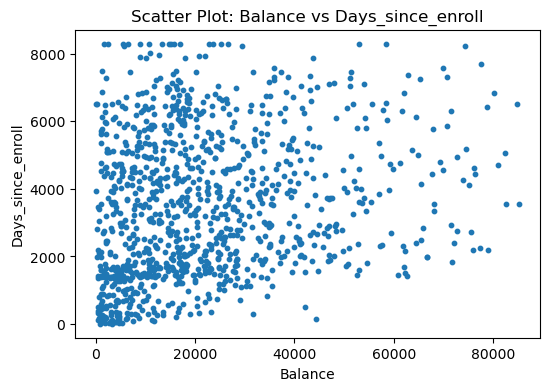

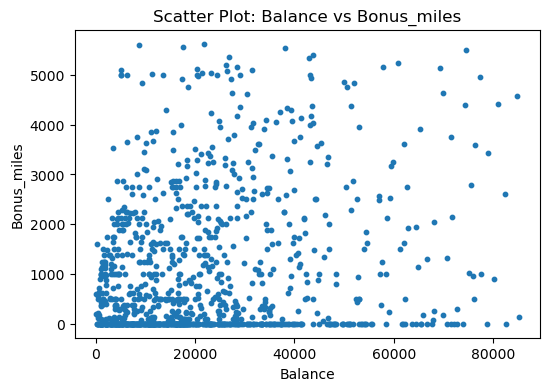

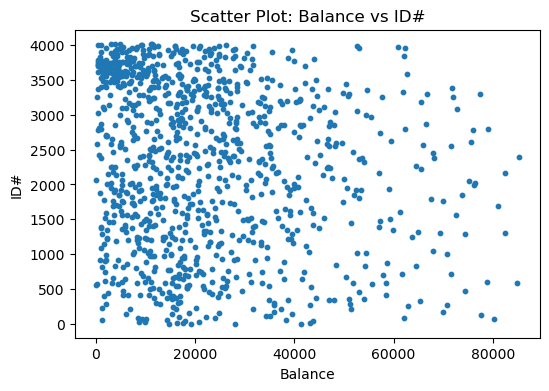

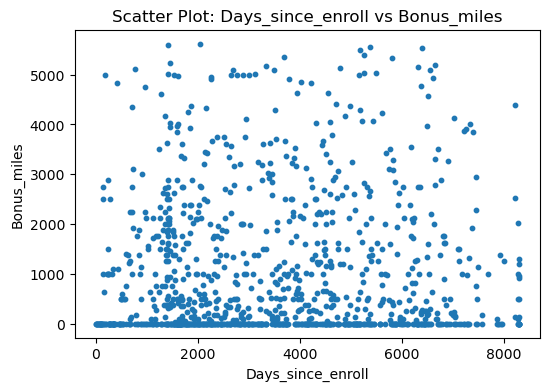

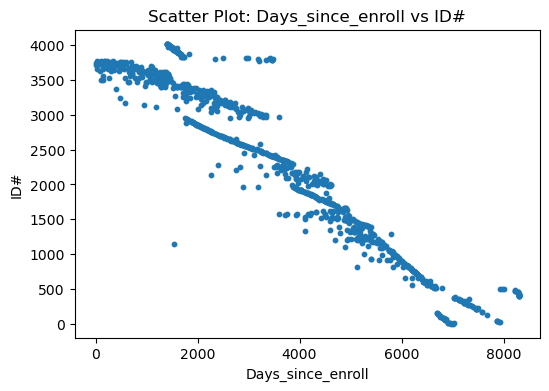

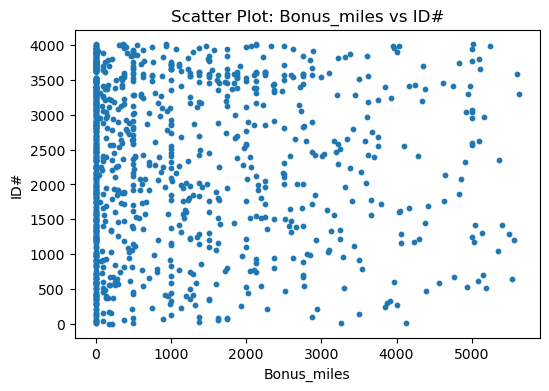

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 2. Basic Overview
# ------------------------------------------------
print("\n--- DATA INFO ---")
print(df.info())

print("\n--- DESCRIPTIVE STATISTICS ---")
print(df.describe())

# ------------------------------------------------
# 3. Distribution Plots (Histograms)
# ------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ------------------------------------------------
# 4. Boxplots (Outlier Inspection)
# ------------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# ------------------------------------------------
# 5. Correlation Matrix
# ------------------------------------------------
corr = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.show()

# ------------------------------------------------
# 6. Scatter Plots to Identify Clusters
# ------------------------------------------------
# Use top 4 variables with highest variance
variances = df.var().sort_values(ascending=False)
top_cols = variances.head(4).index.tolist()

print("\nColumns used for scatter plots (highest variance):", top_cols)

for i in range(len(top_cols)):
    for j in range(i+1, len(top_cols)):
        plt.figure(figsize=(6,4))
        plt.scatter(df[top_cols[i]], df[top_cols[j]], s=10)
        plt.xlabel(top_cols[i])
        plt.ylabel(top_cols[j])
        plt.title(f"Scatter Plot: {top_cols[i]} vs {top_cols[j]}")
        plt.show()




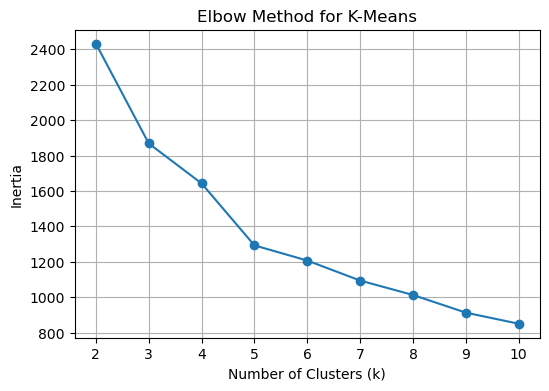

Silhouette Score (K-Means): 0.2826633801128098


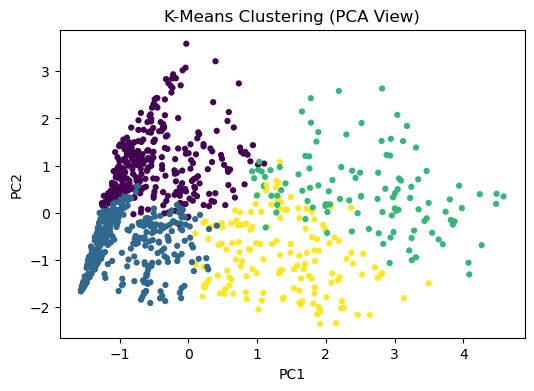

DBSCAN clusters found: {np.int32(0), np.int32(-1)}
Silhouette Score (DBSCAN): 0.3725936200912944


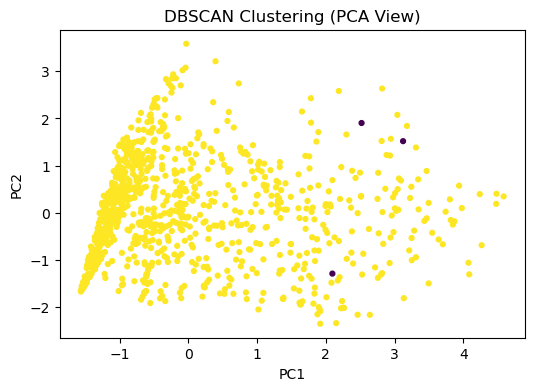


Sample Clustered Data:
   ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  NaN  0.597126         0.0        0.0        0.0        0.0    -0.562489   
1  NaN  0.001308         0.0        0.0        0.0        0.0    -0.521833   
2  NaN  1.481647         0.0        0.0        0.0        0.0     3.353346   
3  NaN -0.297839         0.0        0.0        0.0        0.0    -0.239227   
4  NaN -0.187768         0.0        0.0        0.0        0.0    -0.735028   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0    -0.503199                0.0              0.0           1.659229     0.0   
1    -0.218965                0.0              0.0           1.644157     0.0   
2     0.349502                0.0              0.0           1.675244     0.0   
3    -0.503199                0.0              0.0           1.636620     0.0   
4    -0.787432                0.0              0.0           1.631910     0.0   

   KMeans_Cluster  D

In [15]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# -------------------------------------------------------
# 2. K-Means Clustering
# -------------------------------------------------------
inertia_list = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(6,4))
plt.plot(k_values, inertia_list, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Choose optimal k manually (example k=4, adjust after elbow)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
k_labels = kmeans.fit_predict(df_scaled)

# Silhouette Score
sil_kmeans = silhouette_score(df_scaled, k_labels)
print("Silhouette Score (K-Means):", sil_kmeans)

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(6,4))
plt.scatter(pca_data[:,0], pca_data[:,1], c=k_labels, s=12)
plt.title("K-Means Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# -------------------------------------------------------
# 3. DBSCAN Clustering
# -------------------------------------------------------
dbscan = DBSCAN(eps=1.3, min_samples=5)   # change if needed
db_labels = dbscan.fit_predict(df_scaled)

# Count clusters
unique_clusters = set(db_labels)
print("DBSCAN clusters found:", unique_clusters)

# Silhouette (only if >1 cluster)
if len(unique_clusters) > 1:
    sil_dbscan = silhouette_score(df_scaled, db_labels)
    print("Silhouette Score (DBSCAN):", sil_dbscan)
else:
    print("DBSCAN: Silhouette cannot be computed (only one cluster)")

# DBSCAN Visualization
plt.figure(figsize=(6,4))
plt.scatter(pca_data[:,0], pca_data[:,1], c=db_labels, s=12)
plt.title("DBSCAN Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# -------------------------------------------------------
# 4. Attach Cluster Labels to Original Data
# -------------------------------------------------------
df_results = pd.DataFrame(df_scaled, columns=numeric_cols)
df_results["KMeans_Cluster"] = k_labels
df_results["DBSCAN_Cluster"] = db_labels

print("\nSample Clustered Data:")
print(df_results.head())


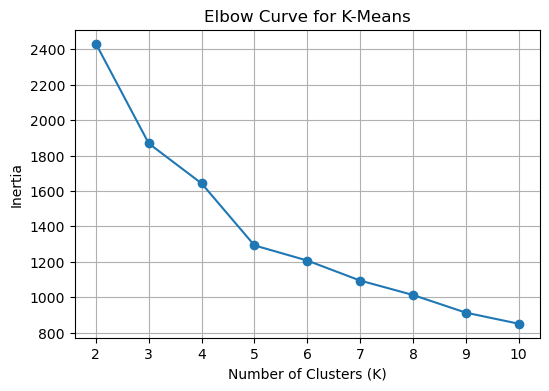

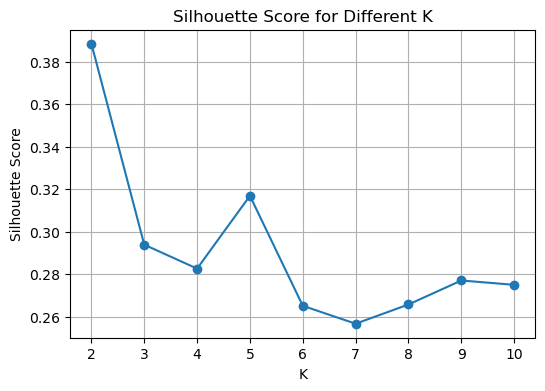


Silhouette Scores for K:
K=2: Silhouette=0.3885
K=3: Silhouette=0.2939
K=4: Silhouette=0.2827
K=5: Silhouette=0.3169
K=6: Silhouette=0.2652
K=7: Silhouette=0.2567
K=8: Silhouette=0.2658
K=9: Silhouette=0.2771
K=10: Silhouette=0.2750


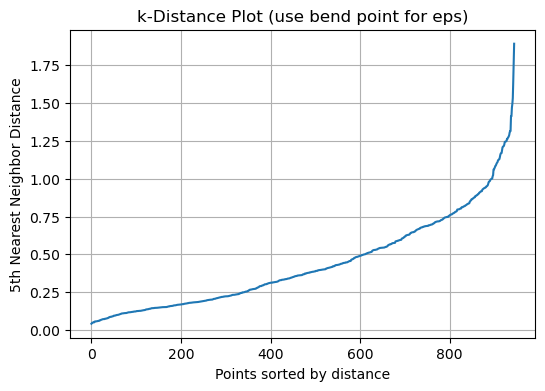


DBSCAN Parameter Experiments:
eps	minPts	Clusters	Silhouette
0.8	3	3		0.24128476729667803
0.8	5	2		0.1940478568180073
0.8	7	2		0.2133661406317142
1.0	3	3		0.18470067508337487
1.0	5	1		None
1.0	7	1		None
1.2	3	1		None
1.2	5	1		None
1.2	7	1		None
1.4	3	1		None
1.4	5	1		None
1.4	7	1		None
1.6	3	1		None
1.6	5	1		None
1.6	7	1		None

Best DBSCAN Params → eps=0.8, minPts=3


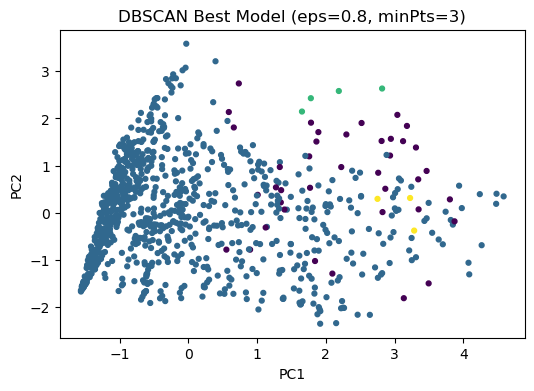

In [22]:

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# -------------------------------------------------------
# 1. Load your preprocessed dataset
# -------------------------------------------------------
X = df_final.values   # df_final = your scaled dataset except ID


# =======================================================
#                K - M E A N S   T U N I N G
# =======================================================

# -------------------------------------------------------
# 2. Elbow Method for finding optimal K
# -------------------------------------------------------
inertia_list = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_values, inertia_list, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# -------------------------------------------------------
# 3. Silhouette Score for each K
# -------------------------------------------------------
sil_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(K_values, sil_scores, marker='o')
plt.title("Silhouette Score for Different K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print("\nSilhouette Scores for K:")
for k, s in zip(K_values, sil_scores):
    print(f"K={k}: Silhouette={s:.4f}")


# =======================================================
#               D B S C A N   T U N I N G
# =======================================================

# -------------------------------------------------------
# 4. k-distance graph (to choose eps)
# -------------------------------------------------------
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort distances of 5th nearest neighbor
distances = np.sort(distances[:,4])

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title("k-Distance Plot (use bend point for eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


# -------------------------------------------------------
# 5. Try different eps and min_samples values
# -------------------------------------------------------
eps_values = [0.8, 1.0, 1.2, 1.4, 1.6]
minPts_values = [3, 5, 7]

results = []

for eps in eps_values:
    for minPts in minPts_values:
        db = DBSCAN(eps=eps, min_samples=minPts)
        labels = db.fit_predict(df_scaled)
        clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # If only one cluster, skip silhouette
        if clusters > 1:
            sil = silhouette_score(df_scaled, labels)
        else:
            sil = None

        results.append((eps, minPts, clusters, sil))

# -------------------------------------------------------
# 6. Print DBSCAN tuning results
# -------------------------------------------------------
print("\nDBSCAN Parameter Experiments:")
print("eps\tminPts\tClusters\tSilhouette")
for eps, mpts, cl, sil in results:
    print(f"{eps}\t{mpts}\t{cl}\t\t{sil}")


# -------------------------------------------------------
# 7. Visualize best DBSCAN model using PCA
# -------------------------------------------------------
# Choose best params based on silhouette (highest)
valid_results = [r for r in results if r[3] is not None]

if valid_results:
    best = max(valid_results, key=lambda x: x[3])
    best_eps, best_minPts = best[0], best[1]
    print(f"\nBest DBSCAN Params → eps={best_eps}, minPts={best_minPts}")

    db_best = DBSCAN(eps=best_eps, min_samples=best_minPts)
    db_labels = db_best.fit_predict(df_scaled)

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(df_scaled)

    plt.figure(figsize=(6,4))
    plt.scatter(pca_data[:,0], pca_data[:,1], c=db_labels, s=12)
    plt.title(f"DBSCAN Best Model (eps={best_eps}, minPts={best_minPts})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()


In [24]:
"""K-Means creates well-separated clusters but treats all points equally, which may force outliers into clusters.
DBSCAN identifies natural density-based groups and separates noise, giving more realistic segmentation in datasets with irregular patterns.
K-Means is good for clean, spherical clusters, while DBSCAN is better when data shows density variations and non-linear structures."""

'K-Means creates well-separated clusters but treats all points equally, which may force outliers into clusters.\nDBSCAN identifies natural density-based groups and separates noise, giving more realistic segmentation in datasets with irregular patterns.\nK-Means is good for clean, spherical clusters, while DBSCAN is better when data shows density variations and non-linear structures.'

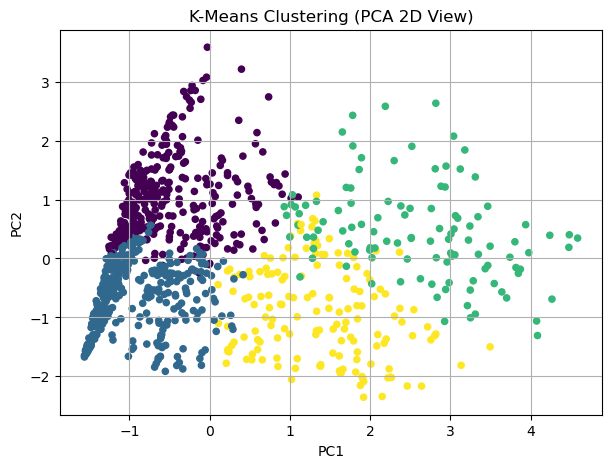

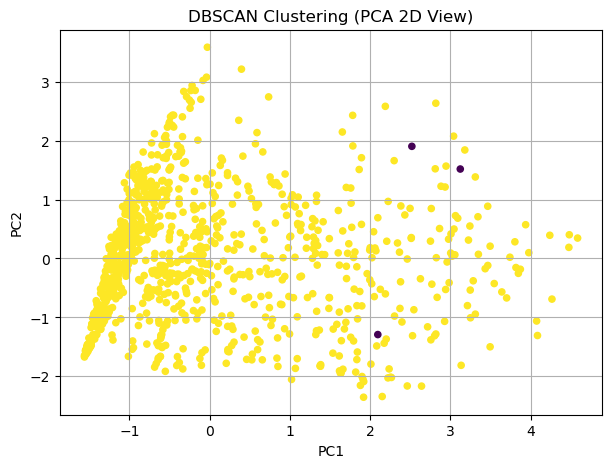

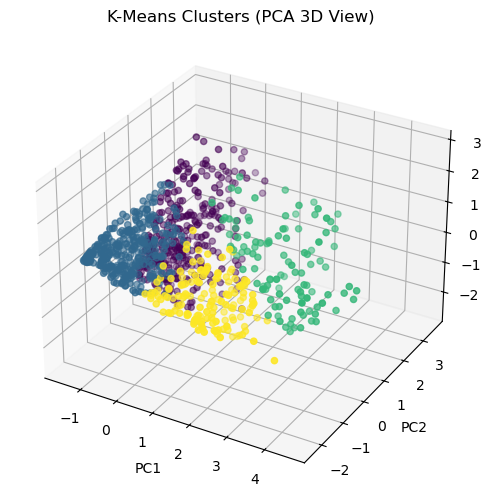

Top 3 features used for pair plots: ['Bonus_miles', 'Bonus_trans', 'Days_since_enroll']


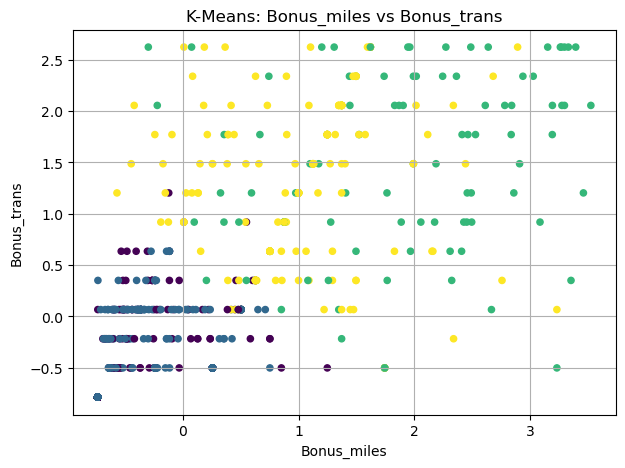

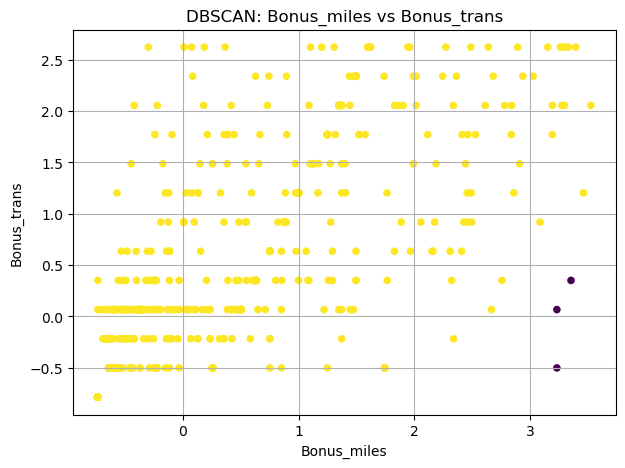

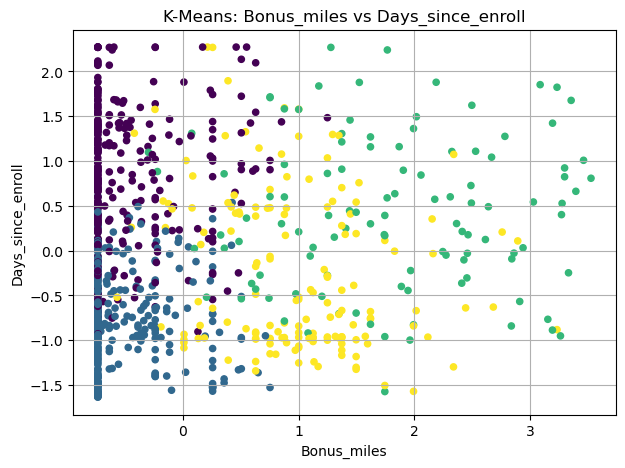

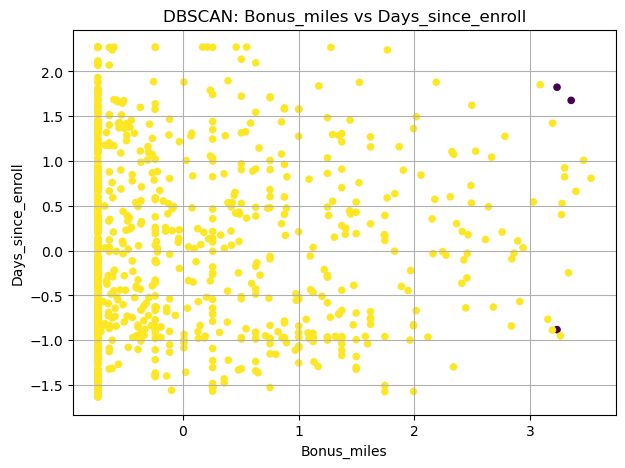

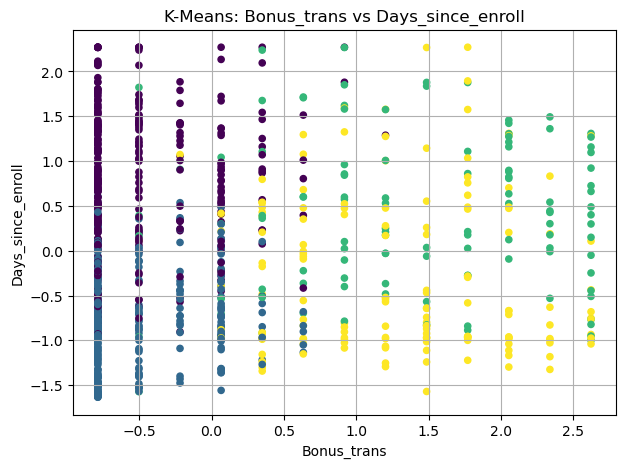

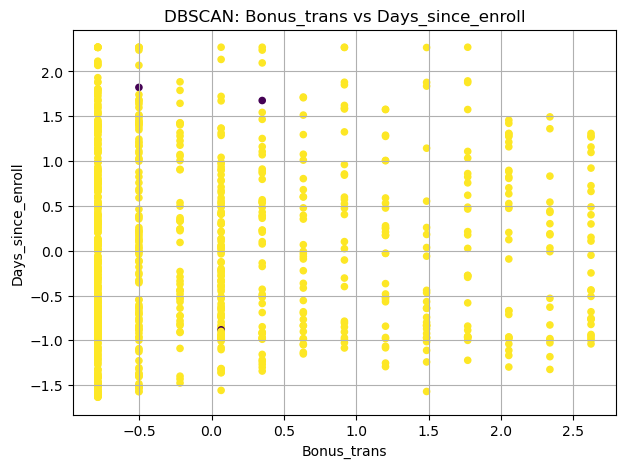

In [34]:
from sklearn.decomposition import PCA

# ----------------------------------------------------
# 1. Load preprocessed + clustered dataset
# ----------------------------------------------------
df = df_final.copy()  # df_final must contain KMeans_Cluster and DBSCAN_Cluster columns

X = df_results.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]).values
kmeans_labels = df_results["KMeans_Cluster"].values
dbscan_labels = df_results["DBSCAN_Cluster"].values

# ----------------------------------------------------
# 2. PCA (2D) for visualization
# ----------------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

# ----------------------------------------------------
# 3. Plot K-Means Clusters
# ----------------------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, s=20)
plt.title("K-Means Clustering (PCA 2D View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ----------------------------------------------------
# 4. Plot DBSCAN Clusters
# ----------------------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, s=20)
plt.title("DBSCAN Clustering (PCA 2D View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ----------------------------------------------------
# 5. Optional: 3D PCA Visualization
# ----------------------------------------------------
pca3 = PCA(n_components=3)
pca_3d = pca3.fit_transform(df_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_3d[:,0], pca_3d[:,1], pca_3d[:,2], c=kmeans_labels, s=20)
ax.set_title("K-Means Clusters (PCA 3D View)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# ----------------------------------------------------
# 6. Feature-Pair Scatter Plots (Top 3 variance features)
# ----------------------------------------------------
variances = df_results.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]).var().sort_values(ascending=False)
top3 = variances.head(3).index.tolist()

print("Top 3 features used for pair plots:", top3)

for i in range(len(top3)):
    for j in range(i+1, len(top3)):
        plt.figure(figsize=(7,5))
        plt.scatter(df_results[top3[i]], df_results[top3[j]], c=kmeans_labels, s=20)
        plt.xlabel(top3[i])
        plt.ylabel(top3[j])
        plt.title(f"K-Means: {top3[i]} vs {top3[j]}")
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(7,5))
        plt.scatter(df_results[top3[i]], df_results[top3[j]], c=dbscan_labels, s=20)
        plt.xlabel(top3[i])
        plt.ylabel(top3[j])
        plt.title(f"DBSCAN: {top3[i]} vs {top3[j]}")
        plt.grid(True)
        plt.show()


In [37]:
from sklearn.metrics import silhouette_score
# -----------------------------------------------------
# 2. K-Means Clustering
# -----------------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(scaled)

# Silhouette score for K-Means
kmeans_sil_score = silhouette_score(scaled, k_labels)
print("Silhouette Score for K-Means (k=4):", kmeans_sil_score)

# -----------------------------------------------------
# 3. DBSCAN Clustering
# -----------------------------------------------------
dbscan = DBSCAN(eps=1.8, min_samples=6)
db_labels = dbscan.fit_predict(scaled)

# Check if DBSCAN produced more than 1 cluster
if len(set(db_labels)) > 1:
    dbscan_sil_score = silhouette_score(scaled, db_labels)
    print("Silhouette Score for DBSCAN:", dbscan_sil_score)
else:
    print("DBSCAN produced only one cluster or all noise — Silhouette score not meaningful.")


Silhouette Score for K-Means (k=4): 0.19071186813310884
Silhouette Score for DBSCAN: 0.2554148739614175
